In [ ]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns 
from datasets import load_dataset 

#Loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

In [ ]:
df_india = df[(df['job_country'] == 'India')].dropna(subset = ['salary_year_avg'])

In [ ]:
job_order = df_india_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

NameError: name 'df_india_top6' is not defined

In [ ]:
job_titles = df_india['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [ ]:
df_india_top6 = df_india[df_india['job_title_short'].isin(job_titles)]
df_india_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781857,Senior Data Engineer,Senior Data Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-26 06:17:50,False,False,India,year,147500.0,NaN,Publicis Groupe,"[sas, sas, sql, python, oracle]","{'analyst_tools': ['sas'], 'cloud': ['oracle']..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


C:\Users\ranveer\AppData\Local\Temp\ipykernel_19836\46602951.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data = df_india_top6 , x = 'salary_year_avg' , y= 'job_title_short' , palette = 'light:g' , order = job_order)


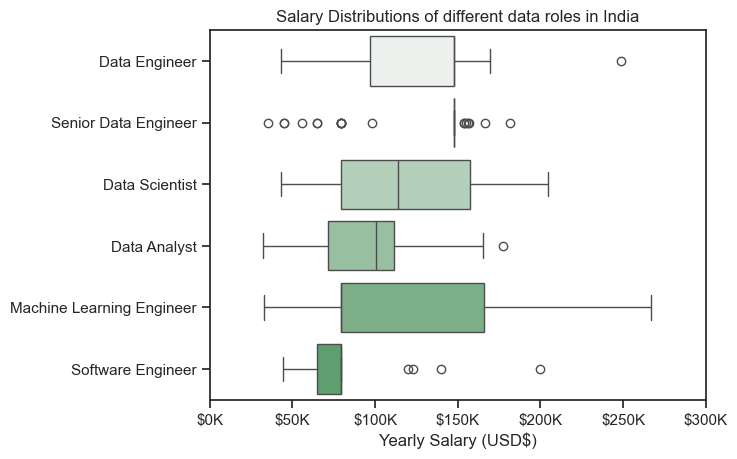

In [ ]:
sns.boxplot( data = df_india_top6 , x = 'salary_year_avg' , y= 'job_title_short' , palette = 'light:g' , order = job_order)
sns.set_theme( style = 'ticks')

plt.title('Salary Distributions of different data roles in India')
plt.ylabel("")
plt.xlabel('Yearly Salary (USD$)')
plt.xlim( 0 , 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


### MEDIAN SALARY vs SKILL for DATA ANALYST 


In [ ]:
df_DA_india = df_DA_india.dropna(subset = ['salary_year_avg'])
df_DA_india = df_DA_india.explode('job_skills')

In [ ]:
df_DA_india[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [ ]:
df_DA_top_pay = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['median' , 'count']).sort_values(by = 'median' , ascending = False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,median,count
job_skills,,
postgresql,165000.0,1
pyspark,165000.0,1
gitlab,165000.0,1
linux,165000.0,1
mysql,165000.0,1
gdpr,163782.0,2
mongodb,163782.0,6
scala,163782.0,3
neo4j,163782.0,1


In [ ]:
df_DA_top_skills = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['median' , 'count']).sort_values(by = 'count', ascending = False)
df_DA_top_skills = df_DA_top_skills.head(10)
df_DA_top_skills = df_DA_top_skills.sort_values(by = 'median' , ascending = False)
df_DA_top_skills

,median,count
job_skills,,
power bi,111175.0,17
spark,111175.0,11
tableau,108087.5,20
excel,98500.0,39
sql,96050.0,46
python,96050.0,36
azure,93600.0,15
r,79200.0,18
aws,79200.0,12


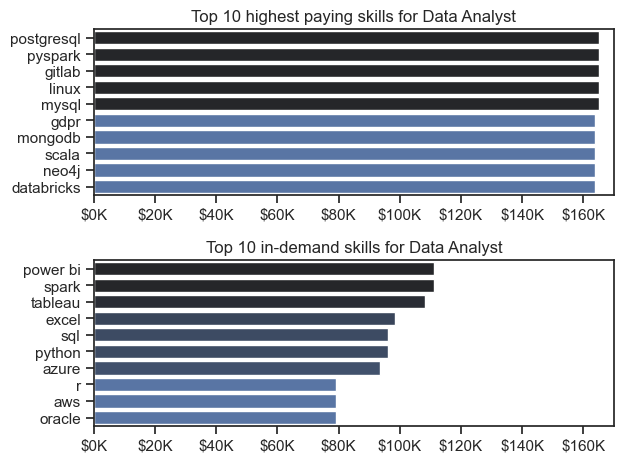

In [ ]:
fig , ax = plt.subplots(2 , 1)

sns.set_theme(style = 'ticks')

#for plotting the top 10 highest paying skills 
sns.barplot( data = df_DA_top_pay , x = 'median' , y = df_DA_top_pay.index , hue = 'median' , ax=ax[0] , legend = False , palette = 'dark:b_r')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[0].set_title('Top 10 highest paying skills for Data Analyst')
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_xlim(0, 170000)


#for plotting the top 10 in-demand skills 
sns.barplot( data = df_DA_top_skills , x = 'median' , y = df_DA_top_skills.index , hue = 'median' , ax=ax[1] , legend = False , palette = 'dark:b_r')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].set_title('Top 10 in-demand skills for Data Analyst')
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlim(0, 170000)
fig.tight_layout()